<a href="https://colab.research.google.com/github/Parsival1/Analisis_de_datos/blob/main/Taller%205%20-%20Proyecto%20final/proyecto_final_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Gestion de librerias*#

In [ ]:
# Procesar la informacion
import pandas as pd
import numpy as np

# Visualizacion del arbol
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Regresion Logistica
from sklearn.tree import DecisionTreeClassifier #
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Evaluacion del Modelo
from sklearn.metrics import accuracy_score, confusion_matrix

# Encriptacion de modelo
import pickle

!pip install pandas-profiling
from pandas_profiling import ProfileReport

#*Lectura, procesamiento y limpieza de datos*#

In [112]:
#Carga y lectura de dataset
dataset = pd.read_excel('10Dataset_medico.xlsx')

In [113]:
#Obtener informacion del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       100 non-null    int64  
 1   Cliente                  100 non-null    object 
 2   Ubicación                100 non-null    object 
 3   Genero                   84 non-null     object 
 4   Ubicacion                40 non-null     object 
 5   Fiebre                   100 non-null    int64  
 6   Tos                      100 non-null    int64  
 7   Dolor de Garganta        99 non-null     float64
 8   Congestión Nasal         98 non-null     object 
 9   Dificultad Respiratoria  100 non-null    object 
 10  Enfermedad               96 non-null     object 
dtypes: float64(1), int64(3), object(7)
memory usage: 8.7+ KB


In [114]:
#Reporte estadistico del dataset
reporte = ProfileReport(dataset)
reporte.to_file(output_file='Reporte.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [115]:
#Eliminar colunma Id ya que no es necesaria
dataset = dataset.drop("Id", axis=1)
#Eliminar colunma Cliente ya que no es necesaria
dataset = dataset.drop("Cliente", axis=1)
#Eliminar colunma Ubicacion ya que no es necesaria
dataset = dataset.drop("Ubicacion", axis=1)
#Eliminar colunma Ubicacion ya que no es necesaria
dataset = dataset.drop("Ubicación", axis=1)

#En este caso habian 2 columnas con el mismo nombre, la unica diferencia era una tilde

Decidí eliminar estas columnas ya que no se consideraron relevantes para saber qué tipo de enfermedad se padece

In [116]:
#Estandarizar ortografia de genero Masculino y cambiar columna string a numerico
dataset.loc[dataset['Genero'] == 'H','Genero'] = 'Masculino'
dataset.loc[dataset['Genero'] == 'Masc','Genero'] = 'Masculino'
dataset.loc[dataset['Genero'] == 'Hombre','Genero'] = 'Masculino'
dataset.loc[dataset['Genero'] == 'Masculino','Genero'] = 1

#Estandarizar ortografia de genero Femenino y cambiar columna string a numerico
dataset.loc[dataset['Genero'] == 'F','Genero'] = 'Femenino'
dataset.loc[dataset['Genero'] == 'Mujer','Genero'] = 'Femenino'
dataset.loc[dataset['Genero'] == 'Femenino','Genero'] = 2

#Estandarizar ortografia de Enfermedad
dataset.loc[dataset['Enfermedad'] == 'Resfriado COMUN','Enfermedad'] = 'Resfriado Común'

#Cambiar valores de columna Fiebre
dataset.loc[dataset['Fiebre'] == 3,'Fiebre'] = dataset['Fiebre'].mode()[0]
dataset.loc[dataset['Fiebre'] == 4,'Fiebre'] = dataset['Fiebre'].mode()[0]

#Cambiar valores de columna Tos
dataset.loc[dataset['Tos'] == -3,'Tos'] = dataset['Tos'].mode()[0]
dataset.loc[dataset['Tos'] == -1,'Tos'] = dataset['Tos'].mode()[0]


#Cambiar valores de columna Dolor de Garganta
dataset.loc[dataset['Dolor de Garganta'] == -1,'Dolor de Garganta'] = dataset['Dolor de Garganta'].mode()[0]
dataset.loc[dataset['Dolor de Garganta'] == 6,'Dolor de Garganta'] = dataset['Dolor de Garganta'].mode()[0]
dataset.loc[dataset['Dolor de Garganta'] == 5,'Dolor de Garganta'] = dataset['Dolor de Garganta'].mode()[0]

#Cambiar valores de columna Congestion Nasal
dataset.loc[dataset['Congestión Nasal'] == 8,'Congestión Nasal'] = dataset['Congestión Nasal'].mode()[0]
dataset.loc[dataset['Congestión Nasal'] == "Nan",'Congestión Nasal'] = dataset['Congestión Nasal'].mode()[0]

#Cambiar valores de columna Dificultad Respiratoria
dataset.loc[dataset['Dificultad Respiratoria'] == -1,'Dificultad Respiratoria'] = dataset['Dificultad Respiratoria'].mode()[0]
dataset.loc[dataset['Dificultad Respiratoria'] == 7,'Dificultad Respiratoria'] = dataset['Dificultad Respiratoria'].mode()[0]
dataset.loc[dataset['Dificultad Respiratoria'] == 3,'Dificultad Respiratoria'] = dataset['Dificultad Respiratoria'].mode()[0]
dataset.loc[dataset['Dificultad Respiratoria'] == 'Nan','Dificultad Respiratoria'] = dataset['Dificultad Respiratoria'].mode()[0]
dataset.loc[dataset['Dificultad Respiratoria'] == 'None','Dificultad Respiratoria'] = dataset['Dificultad Respiratoria'].mode()[0]


In [117]:
#Llenar valores NaN de la colunma Genero
moda_genero = dataset['Genero'].mode()[0]
dataset['Genero'].fillna(moda_genero, inplace=True)

#Llenar valores NaN de la colunma Dolor de Garganta
moda_Dolor = dataset['Dolor de Garganta'].mode()[0]
dataset['Dolor de Garganta'].fillna(moda_Dolor, inplace=True)

#Llenar valores NaN de la colunma Congestion Nasal
moda_congestion = dataset['Congestión Nasal'].mode()[0]
dataset['Congestión Nasal'].fillna(moda_congestion, inplace=True)

#Llenar valores NaN de la colunma Dificultad Respiratoria
moda_dificultad = dataset['Dificultad Respiratoria'].mode()[0]
dataset['Dificultad Respiratoria'].fillna(moda_dificultad, inplace=True)

#Llenar valores NaN de la colunma Enfermedad
valor = 'Resfriado Común'
dataset['Enfermedad'].fillna(valor, inplace=True)

In [118]:
#Cambiar nombre de encabezado de las columnas paraa trabajar mas comodamente
dataset.rename(columns={'Dolor de Garganta': 'Dolor_garganta'}, inplace=True)
dataset.rename(columns={'Congestión Nasal': 'Congestion_nasal'}, inplace=True)
dataset.rename(columns={'Dificultad Respiratoria': 'Dificultad_respiratoria'}, inplace=True)

In [119]:
#Obtener informacion del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genero                   100 non-null    int64  
 1   Fiebre                   100 non-null    int64  
 2   Tos                      100 non-null    int64  
 3   Dolor_garganta           100 non-null    float64
 4   Congestion_nasal         100 non-null    int64  
 5   Dificultad_respiratoria  100 non-null    object 
 6   Enfermedad               100 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 5.6+ KB


In [120]:
##Reporte estadistico del dataset final
reporte = ProfileReport(dataset)
reporte.to_file(output_file='Reporte#2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#*Entrenamiento de datos*#

In [121]:
# Mezclar los datos
dataset = shuffle(dataset, random_state=1)

In [122]:
# Seleccionar las variables relevantes
variables = ['Genero', 'Fiebre', 'Tos', 'Dolor_garganta','Congestion_nasal','Dificultad_respiratoria']

X = dataset[variables]
y = dataset['Enfermedad']

In [123]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Crear el modelo de Clasificacion
model = DecisionTreeClassifier(random_state=1000)

In [125]:
# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1000)

In [126]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [127]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: %.2f' % accuracy)

Precisión del modelo: 0.95


In [128]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

Matriz de confusión:
[[6 1 0]
 [0 7 0]
 [0 0 6]]


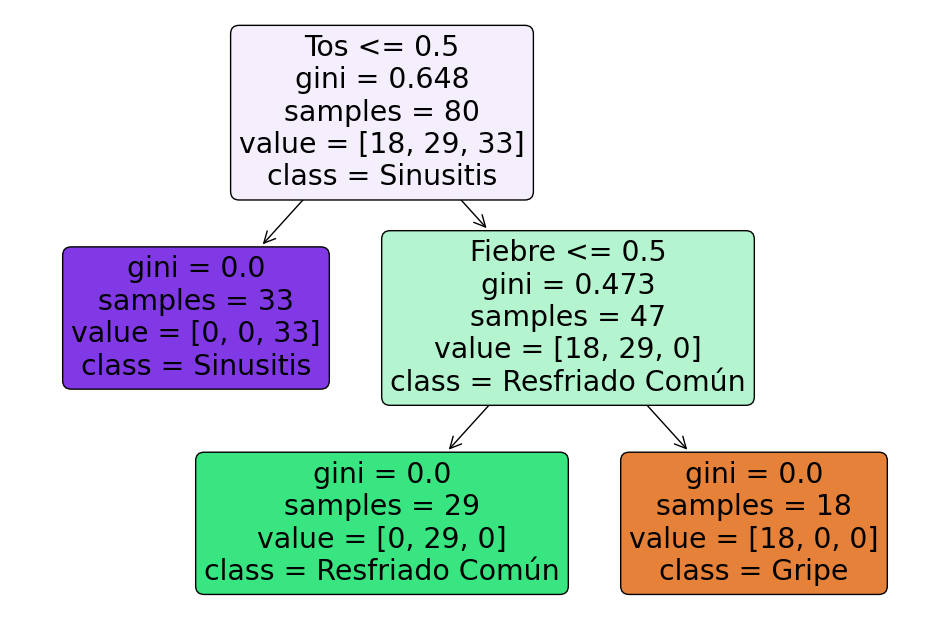

In [129]:
#Grafica de arbol
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=dataset.columns[:-1], class_names=model.classes_, filled=True, rounded=True)
plt.show()

In [130]:
#Datos de prueba
Genero = 2
Fiebre = 1
Tos = 1
Dolor_Garganta = 1
Congestión_Nasal = 1
Dificultad_Respiratoria = 1

In [131]:
# Valores futuros
new_samples = np.array([[Genero, Fiebre, Tos, Dolor_Garganta,Congestión_Nasal,Dificultad_Respiratoria]])
new_samples2 = np.array([[Fiebre, Tos, Dolor_Garganta,Congestión_Nasal,Dificultad_Respiratoria]])

# Realiza predicciones en las nuevas muestras utilizando el modelo de árbol de decisión
y_pred_new = model.predict(new_samples)

suma_valores = np.sum(new_samples2)

if suma_valores == 0:
    print("Usted no esta presentando ningun sintoma, usted esta sano")
else:
    print(f"Según los síntomas que está presentando, apuntan a que posiblemente tiene: {y_pred_new[0]}")

Según los síntomas que está presentando, apuntan a que posiblemente tiene: Gripe


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#*Exportacion de datos*#

In [132]:
# Guardar el modelo en un archivo
with open('prediccion_medica.pkl', 'wb') as file:
    pickle.dump(model, file)